<a href="https://colab.research.google.com/github/EfandraEka/SISTEM-PREDICTION-MENTAL-HEALTH/blob/main/PERCOBAAN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =============================================
# BAGIAN 1 — UPLOAD DUA ZIP DATASET
# =============================================
from google.colab import files

print("Silakan upload dua file ZIP ")
uploaded = files.upload()

# Ambil nama semua file ZIP yang diupload
zip_names = list(uploaded.keys())
print("\nFile ZIP yang diupload:", zip_names)

Silakan upload dua file ZIP 


Saving archive (1).zip to archive (1) (2).zip
Saving Mental-health-tables-National.zip to Mental-health-tables-National (1).zip

File ZIP yang diupload: ['archive (1) (2).zip', 'Mental-health-tables-National (1).zip']


In [ ]:
# =============================================
# BAGIAN 2 — EKSTRAK SETIAP ZIP
# =============================================
import zipfile, os

extract_dirs = []

for zip_name in zip_names:
    extract_dir = zip_name.replace(".zip", "_extracted")
    os.makedirs(extract_dir, exist_ok=True)
    with zipfile.ZipFile(zip_name, 'r') as zf:
        zf.extractall(extract_dir)
    extract_dirs.append(extract_dir)
    print(f" {zip_name} berhasil diekstrak ke folder: {extract_dir}")

 archive (1) (2).zip berhasil diekstrak ke folder: archive (1) (2)_extracted
 Mental-health-tables-National (1).zip berhasil diekstrak ke folder: Mental-health-tables-National (1)_extracted


In [ ]:
# =============================================
# BAGIAN 3 — DETEKSI SEMUA FILE DATA
# =============================================
data_files = []
for extract_dir in extract_dirs:
    for root, _, files_ in os.walk(extract_dir):
        for f in files_:
            if f.lower().endswith(('.csv', '.xlsx', '.xls')):
                data_files.append(os.path.join(root, f))

if not data_files:
    raise SystemExit("Tidak ditemukan file .csv / .xlsx / .xls di dalam ZIP manapun.")

print(f"\nTotal ditemukan {len(data_files)} file data:")
for f in data_files:
    print(" -", f)


Total ditemukan 18 file data:
 - archive (1) (2)_extracted/Combined Data.csv
 - Mental-health-tables-National (1)_extracted/Table 17 - PBS mental health-related medications dispensed in the last 12 months by age and sex.xlsx
 - Mental-health-tables-National (1)_extracted/Table 9 - Suicidal thoughts and behaviours by age and sex.xlsx
 - Mental-health-tables-National (1)_extracted/Table 1 - Lifetime mental disorders by sex.xlsx
 - Mental-health-tables-National (1)_extracted/Table 8 - Comorbidity of 12-month mental disorders and physical conditions.xlsx
 - Mental-health-tables-National (1)_extracted/Table 10 - Whether close to someone who took or attempted to take own life by age and sex.xlsx
 - Mental-health-tables-National (1)_extracted/Table 15 - Social connectedness and self-management strategies for mental health.xlsx
 - Mental-health-tables-National (1)_extracted/Table 6 - Consultations with health professionals for mental health by age and sex.xlsx
 - Mental-health-tables-National

In [ ]:
# =============================================
# BAGIAN 4 — MEMBACA SEMUA DATA DAN MENGGABUNGKAN
# =============================================
import pandas as pd

df_list = []
for f in data_files:
    try:
        if f.endswith(".csv"):
            temp = pd.read_csv(f)
        else:
            temp = pd.read_excel(f)
        df_list.append(temp)
        print(f" {os.path.basename(f)} dimuat dengan shape {temp.shape}")
    except Exception as e:
        print(f"Gagal membaca {f}: {e}")

# Gabungkan semua data jadi satu DataFrame
df = pd.concat(df_list, ignore_index=True, sort=False)
print("\n Data gabungan dimuat dengan shape:", df.shape)
df.head()

 Combined Data.csv dimuat dengan shape (53043, 3)
 Table 17 - PBS mental health-related medications dispensed in the last 12 months by age and sex.xlsx dimuat dengan shape (16, 2)
 Table 9 - Suicidal thoughts and behaviours by age and sex.xlsx dimuat dengan shape (16, 2)
 Table 1 - Lifetime mental disorders by sex.xlsx dimuat dengan shape (16, 2)
 Table 8 - Comorbidity of 12-month mental disorders and physical conditions.xlsx dimuat dengan shape (16, 2)
 Table 10 - Whether close to someone who took or attempted to take own life by age and sex.xlsx dimuat dengan shape (16, 2)
 Table 15 - Social connectedness and self-management strategies for mental health.xlsx dimuat dengan shape (16, 2)
 Table 6 - Consultations with health professionals for mental health by age and sex.xlsx dimuat dengan shape (16, 2)
 Table 13 - Perceived need for help for people who did not consult a health professional.xlsx dimuat dengan shape (16, 2)
 Table 2 - 12-month mental disorders and severity by sex.xlsx di

,Unnamed: 0,statement,status,This tab outlines the contents of datacube 17. It ranges from cell A1 to B17.,Unnamed: 1,This tab outlines the contents of datacube 9. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 1. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 8. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 10. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 15. It ranges from cell A1 to B17,...,This tab outlines the contents of datacube 2. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 16. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 12. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 5. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 14. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 4. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 4. It ranges from cell A1 to B17..1,This tab outlines the contents of datacube 7. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 3. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 11. It ranges from cell A1 to B17.
0,0.0,oh my gosh,Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,"trouble sleeping, confused mind, restless hear...",Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,I've shifted my focus to something else but I'...,Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,"I'm restless and restless, it's been a month n...",Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# =============================================
# BAGIAN 5 — PEMBERSIHAN DASAR
# =============================================
import numpy as np

# Hapus kolom kosong dan duplikat
df = df.loc[:, df.notna().any()]
df = df.drop_duplicates()

# Deteksi kolom target otomatis
target_candidates = [c for c in df.columns if any(x in c.lower() for x in [
    "depress", "anxiet", "score", "diagnos", "phq", "gad", "k10", "mental", "disorder"
])]
if target_candidates:
    target_col = target_candidates[0]
else:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if not numeric_cols:
        raise SystemExit("Tidak ada kolom numerik untuk membuat target.")
    target_col = numeric_cols[0]

print(f"\nKolom target yang digunakan: {target_col}")

# Buat kolom target biner (0/1)
if pd.api.types.is_numeric_dtype(df[target_col]):
    threshold = df[target_col].median(skipna=True)
    df["target_binary"] = (df[target_col] > threshold).astype(int)
else:
    df["target_binary"] = df[target_col].astype("category").cat.codes


Kolom target yang digunakan: Unnamed: 0


In [ ]:
# =============================================
# BAGIAN 6 — IMPUTASI & ENCODING
# =============================================
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")

if num_cols:
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
if cat_cols:
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Encoding kategori
for c in cat_cols:
    if df[c].nunique() <= 20:
        dummies = pd.get_dummies(df[c].astype(str), prefix=c)
        df = pd.concat([df, dummies], axis=1)
        df.drop(columns=[c], inplace=True)
    else:
        df[c] = df[c].astype("category").cat.codes

In [ ]:
# =============================================
# BAGIAN 7 — STANDARDISASI FITUR NUMERIK
# =============================================
from sklearn.preprocessing import StandardScaler

num_features = [c for c in df.select_dtypes(include=[np.number]).columns if c != "target_binary"]
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [ ]:
# =============================================
# BAGIAN 8 — SIMPAN DATA SIAP MODEL
# =============================================
output_file = "processed_mental_health_combined.csv"
df.to_csv(output_file, index=False)

print(f"\nData dari dua ZIP berhasil digabung & diproses.")
print(f" Disimpan sebagai: {output_file}")
print("Jumlah baris:", len(df))
print("Jumlah kolom:", len(df.columns))
df.head()


Data dari dua ZIP berhasil digabung & diproses.
 Disimpan sebagai: processed_mental_health_combined.csv
Jumlah baris: 53315
Jumlah kolom: 301


,Unnamed: 0,statement,Unnamed: 1,target_binary,status_Anxiety,status_Bipolar,status_Depression,status_Normal,status_Personality disorder,status_Stress,...,This tab outlines the contents of datacube 11. It ranges from cell A1 to B17._Tab,This tab outlines the contents of datacube 11. It ranges from cell A1 to B17._Table 11.1,This tab outlines the contents of datacube 11. It ranges from cell A1 to B17._Table 11.2,This tab outlines the contents of datacube 11. It ranges from cell A1 to B17._Table 11.3,This tab outlines the contents of datacube 11. It ranges from cell A1 to B17._Table 11.4,This tab outlines the contents of datacube 11. It ranges from cell A1 to B17._The ABS privacy policy outlines how we handle any personal information that you have provided to us,"This tab outlines the contents of datacube 11. It ranges from cell A1 to B17._This data comes from National Study of Mental Health and Wellbeing, 2020-2022",This tab outlines the contents of datacube 11. It ranges from cell A1 to B17._Unknown,"This tab outlines the contents of datacube 11. It ranges from cell A1 to B17._Visit National Study of Mental Health and Wellbeing methodology, 2020-2022 to understand more about how this data was collected",This tab outlines the contents of datacube 11. It ranges from cell A1 to B17._© Commonwealth of Australia 2023
0,-1.736453,1.364868,0.035164,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-1.736388,1.587642,0.035164,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-1.736322,-1.589803,0.035164,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,-1.736257,-0.297160,0.035164,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-1.736191,-0.315181,0.035164,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


 Data siap digunakan untuk training
Train: 42652  | Test: 10663


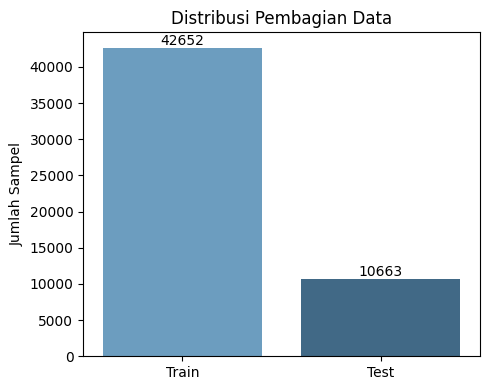

In [ ]:
# =============================================
# BAGIAN 9 — SPLIT DATA + VISUALISASI
# =============================================
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(" Data siap digunakan untuk training")
print(f"Train: {X_train.shape[0]}  | Test: {X_test.shape[0]}")

# Buat DataFrame ringkasan
split_data = pd.DataFrame({
    'Jenis Data': ['Train', 'Test'],
    'Jumlah': [len(X_train), len(X_test)]
})

# Visualisasi pembagian data tanpa warning
plt.figure(figsize=(5,4))
sns.barplot(
    data=split_data,
    x="Jenis Data", y="Jumlah",
    hue="Jenis Data",  # <== tambahkan hue agar sesuai versi seaborn 0.14+
    palette="Blues_d",
    legend=False
)
plt.title("Distribusi Pembagian Data", fontsize=12)
plt.ylabel("Jumlah Sampel")
plt.xlabel("")

# Tambahkan label jumlah di atas batang
for index, value in enumerate(split_data['Jumlah']):
    plt.text(index, value + (max(split_data['Jumlah']) * 0.01), str(value), ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# =============================================
# BAGIAN 10 — NORMALISASI DATA
# =============================================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

print("Data berhasil dinormalisasi ")


Data berhasil dinormalisasi 


In [ ]:
# =============================================
# BAGIAN 11 — PENYEIMBANGAN DATA (SMOTE)
# =============================================
!pip install -q imbalanced-learn

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

import pandas as pd
print("Distribusi sebelum SMOTE:")
print(pd.Series(y_train).value_counts())

print("\nDistribusi sesudah SMOTE:")
print(pd.Series(y_train_res).value_counts())

Distribusi sebelum SMOTE:
target_binary
0.0    21435
1.0    21217
Name: count, dtype: int64

Distribusi sesudah SMOTE:
target_binary
0.0    21435
1.0    21435
Name: count, dtype: int64


In [ ]:
# =============================================
# BAGIAN 12 — CONFUSION MATRIX HEATMAP
# =============================================

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
from IPython.display import display
import time

def evaluate_model(model_name, y_true, y_pred, figsize=(5,4), cmap="YlGnBu"):
    """
    Evaluasi model dan tampilkan confusion matrix heatmap.

    """
    acc = accuracy_score(y_true, y_pred)
    print(f"\n Hasil {model_name}")
    print(f"Akurasi: {acc:.4f}\n")
    print(classification_report(y_true, y_pred))

    labels = sorted(np.unique(y_true))
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_df = pd.DataFrame(cm, index=[f"Actual {i}" for i in labels],
                         columns=[f"Pred {i}" for i in labels])

    print("\nConfusion Matrix (Tabel):")
    display(cm_df)

    plt.figure(figsize=figsize)
    sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, square=True, cbar=True)
    plt.title(f"Confusion Matrix — {model_name}", fontsize=12)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()
    time.sleep(0.3)

    return acc


 Hasil Naive Bayes
Akurasi: 0.5030

              precision    recall  f1-score   support

         0.0       1.00      0.01      0.02      5359
         1.0       0.50      1.00      0.67      5304

    accuracy                           0.50     10663
   macro avg       0.75      0.51      0.34     10663
weighted avg       0.75      0.50      0.34     10663


Confusion Matrix (Tabel):


,Pred 0.0,Pred 1.0
Actual 0.0,60,5299
Actual 1.0,0,5304


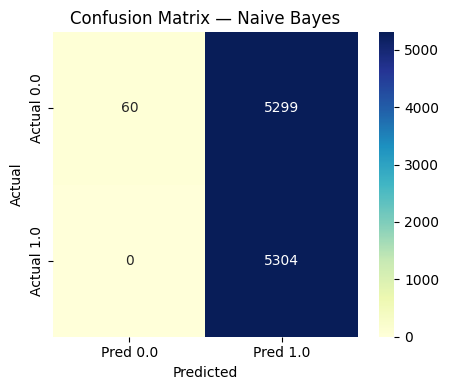

In [ ]:
# =============================================
# BAGIAN 13 — MODEL NAIVE BAYES
# =============================================
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train_res, y_train_res)

y_pred_nb = model_nb.predict(X_test)

acc_nb = evaluate_model("Naive Bayes", y_test, y_pred_nb)


 Hasil SVM (RBF Kernel)
Akurasi: 0.9841

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      5359
         1.0       1.00      0.97      0.98      5304

    accuracy                           0.98     10663
   macro avg       0.98      0.98      0.98     10663
weighted avg       0.98      0.98      0.98     10663


Confusion Matrix (Tabel):


,Pred 0.0,Pred 1.0
Actual 0.0,5359,0
Actual 1.0,170,5134


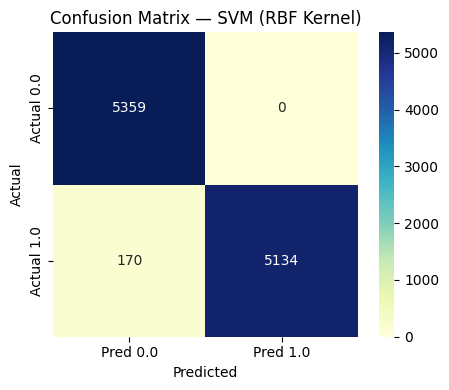

In [ ]:
# =============================================
# BAGIAN 14 — MODEL SVM
# =============================================
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', probability=True, random_state=42)
model_svm.fit(X_train_res, y_train_res)

y_pred_svm = model_svm.predict(X_test)

acc_svm = evaluate_model("SVM (RBF Kernel)", y_test, y_pred_svm)

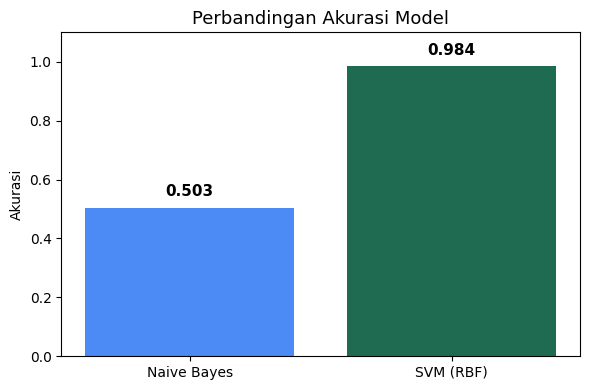

In [ ]:
# =============================================
# BAGIAN 15 — PERBANDINGAN AKURASI MODEL
# =============================================
import matplotlib.pyplot as plt

model_names = ['Naive Bayes', 'SVM (RBF)']
accuracies = [acc_nb, acc_svm]

plt.figure(figsize=(6,4))
bars = plt.bar(model_names, accuracies, color=["#4C8BF5", "#1E6B52"])
plt.title("Perbandingan Akurasi Model", fontsize=13)
plt.ylabel("Akurasi")
plt.ylim(0, 1.1)  # Tambah ruang di atas agar angka tidak menabrak

# Tambahkan nilai di atas bar dengan posisi aman
for bar, acc in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.03,       # Tambah jarak dari puncak bar
        f"{acc:.3f}",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

In [ ]:
# =============================================
# BAGIAN 16 — SIMPAN MODEL TERBAIK UNTUK DEPLOYMENT
# =============================================
import joblib
import os

# Pastikan folder penyimpanan ada
os.makedirs("saved_models", exist_ok=True)

# Bandingkan akurasi model
best_model_name = "SVM (RBF)" if acc_svm > acc_nb else "Naive Bayes"
best_model = model_svm if acc_svm > acc_nb else model_nb

print(f" Model terbaik berdasarkan akurasi: {best_model_name}")

# Simpan model terbaik dan scaler
joblib.dump(best_model, "saved_models/best_model.pkl")
joblib.dump(scaler, "saved_models/standard_scaler.pkl")

# Simpan juga kedua model opsional
joblib.dump(model_nb, "saved_models/naive_bayes_model.pkl")
joblib.dump(model_svm, "saved_models/svm_rbf_model.pkl")

print(" Semua model dan scaler berhasil disimpan di folder 'saved_models/'")


 Model terbaik berdasarkan akurasi: SVM (RBF)
 Semua model dan scaler berhasil disimpan di folder 'saved_models/'


In [ ]:
# =============================================
# BAGIAN 17 — MUAT MODEL TERBAIK UNTUK PREDIKSI
# =============================================
import joblib

def load_best_model():
    model = joblib.load("saved_models/best_model.pkl")
    scaler = joblib.load("saved_models/standard_scaler.pkl")
    print(" Model terbaik dan Scaler berhasil dimuat.")
    return model, scaler

# Contoh penggunaan:
best_model_loaded, scaler_loaded = load_best_model()


 Model terbaik dan Scaler berhasil dimuat.


In [ ]:
import joblib, os

# Pastikan folder tempat menyimpan ada
os.makedirs("saved_models", exist_ok=True)

# Simpan model terbaik & scaler
joblib.dump(best_model, "saved_models/best_model.pkl")
joblib.dump(scaler, "saved_models/standard_scaler.pkl")

print(" Model dan Scaler berhasil disimpan di folder 'saved_models/'")

 Model dan Scaler berhasil disimpan di folder 'saved_models/'


In [ ]:
from google.colab import drive
import shutil

# Hubungkan ke Google Drive
drive.mount('/content/drive')

# Salin model ke Drive
shutil.copy("saved_models/best_model.pkl", "/content/drive/MyDrive/best_model.pkl")
shutil.copy("saved_models/standard_scaler.pkl", "/content/drive/MyDrive/standard_scaler.pkl")

print(" Model disalin ke Google Drive/MyDrive/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Model disalin ke Google Drive/MyDrive/
